In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
# Paths and parameters
dataset_dir = 'Body Parts'
img_size = (224, 224)
batch_size = 8
epochs = 20

In [3]:
# Data generators
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1158 images belonging to 5 classes.
Found 289 images belonging to 5 classes.


In [4]:
# Model architecture
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Save model as TensorFlow SavedModel format
checkpoint = ModelCheckpoint('saved_model/body_parts_model', save_best_only=True, monitor='val_accuracy', mode='max', save_format='tf')


In [6]:
# Train model
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    callbacks=[checkpoint]
)

Epoch 1/20
145/145 [==============================] - ETA: 0s - loss: 0.9982 - accuracy: 0.6062INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


145/145 [==============================] - 24s 163ms/step - loss: 0.9982 - accuracy: 0.6062 - val_loss: 0.7390 - val_accuracy: 0.7232
Epoch 2/20
145/145 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.7703INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


145/145 [==============================] - 24s 164ms/step - loss: 0.6297 - accuracy: 0.7703 - val_loss: 0.5996 - val_accuracy: 0.7855
Epoch 3/20
145/145 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.9093INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


145/145 [==============================] - 26s 182ms/step - loss: 0.2933 - accuracy: 0.9093 - val_loss: 0.5256 - val_accuracy: 0.8512
Epoch 4/20
145/145 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.9534INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


145/145 [==============================] - 25s 175ms/step - loss: 0.1570 - accuracy: 0.9534 - val_loss: 0.4390 - val_accuracy: 0.8720
Epoch 5/20
145/145 [==============================] - 24s 166ms/step - loss: 0.0881 - accuracy: 0.9741 - val_loss: 0.5430 - val_accuracy: 0.8547
Epoch 6/20
145/145 [==============================] - 26s 180ms/step - loss: 0.0781 - accuracy: 0.9750 - val_loss: 0.6630 - val_accuracy: 0.8651
Epoch 7/20
145/145 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9611INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


145/145 [==============================] - 24s 167ms/step - loss: 0.1272 - accuracy: 0.9611 - val_loss: 0.4545 - val_accuracy: 0.8858
Epoch 8/20
145/145 [==============================] - 31s 213ms/step - loss: 0.0816 - accuracy: 0.9767 - val_loss: 0.7783 - val_accuracy: 0.8374
Epoch 9/20
145/145 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9931INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


145/145 [==============================] - 27s 186ms/step - loss: 0.0248 - accuracy: 0.9931 - val_loss: 0.6411 - val_accuracy: 0.8893
Epoch 10/20
145/145 [==============================] - 27s 188ms/step - loss: 0.0085 - accuracy: 0.9965 - val_loss: 0.7397 - val_accuracy: 0.8858
Epoch 11/20
145/145 [==============================] - 24s 164ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.9925 - val_accuracy: 0.8720
Epoch 12/20
145/145 [==============================] - 24s 168ms/step - loss: 0.0500 - accuracy: 0.9862 - val_loss: 0.8312 - val_accuracy: 0.8789
Epoch 13/20
145/145 [==============================] - 24s 166ms/step - loss: 0.0110 - accuracy: 0.9983 - val_loss: 1.0816 - val_accuracy: 0.8858
Epoch 14/20
145/145 [==============================] - 24s 168ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 1.1404 - val_accuracy: 0.8754
Epoch 15/20
145/145 [==============================] - 24s 166ms/step - loss: 0.0116 - accuracy: 0.9957 - val_loss: 1.2921 - val_accurac

INFO:tensorflow:Assets written to: saved_model/body_parts_model/assets


145/145 [==============================] - 31s 211ms/step - loss: 9.3781e-04 - accuracy: 1.0000 - val_loss: 0.9393 - val_accuracy: 0.8962
Epoch 20/20
145/145 [==============================] - 33s 227ms/step - loss: 3.0913e-04 - accuracy: 1.0000 - val_loss: 0.9630 - val_accuracy: 0.8962


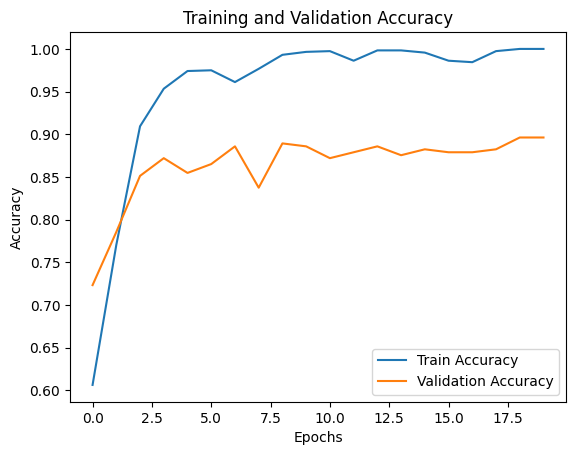

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
